In [1]:
import os
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

In [2]:
dir_data = '../data/ml100marathon'
train_app = os.path.join(dir_data, 'train_data.csv')
test_app = os.path.join(dir_data, 'test_features.csv')

In [3]:
df_train = pd.read_csv(train_app)
#df_train.head()
df_test = pd.read_csv(test_app)
#df_test.head()

In [4]:
df_train['deferred_income']*=-1
df_test['deferred_income']*=-1
df_train['restricted_stock_deferred']*=-1
df_test['restricted_stock_deferred']*=-1
train_Y = df_train['poi']
test_name = df_test['name']
#result_back = df_test[df_test['name']=='TOTAL']
df_train_d = df_train.drop(['director_fees','name','loan_advances','email_address','restricted_stock_deferred','poi'] , axis=1)
df_test_d = df_test.copy()
#df_test_d[df_test_d['name'] == 'TOTAL'] = np.nan
df_test_d = df_test_d.drop(['director_fees','name','loan_advances','restricted_stock_deferred','email_address'] , axis=1)
#result_back_d = result_back.drop(['director_fees','loan_advances','name','restricted_stock_deferred','email_address'] , axis=1)

print(df_train_d.values.shape)
print(df_test_d.values.shape)
df = pd.concat([df_train_d,df_test_d])
print(df.values.shape)
train_num = train_Y.shape[0]
#df

(113, 16)
(33, 16)
(146, 16)


In [5]:
def fill_and_scale(in_df,fill_by,scale_by):
    if fill_by == 'mean':
        df1 = in_df.fillna(in_df.mean())
    elif fill_by == 'median':
        df1 = in_df.fillna(in_df.median())
    elif fill_by == 'zero':
        df1 = in_df.fillna(0)

    if scale_by == 'std':
        df1[df1.columns] = StandardScaler().fit_transform(df1[df1.columns])
    elif scale_by == 'minmax':
        df1[df1.columns] = MinMaxScaler().fit_transform(df1[df1.columns])
    return df1

def run_and_predict(model,_train_X,_train_Y,_test_X,_test_Y):
    model.fit(_train_X,_train_Y)
    y_test_pred = model.predict(_test_X)
    ascore = accuracy_score(y_test_pred,_test_Y)
    prob_out = model.predict_proba(_test_X)[:,1];
    print("prob_out.shape",prob_out.shape)
    print("_test_Y.shape",_test_Y.shape)
    aucscore = roc_auc_score(_test_Y,prob_out)
    print("accuracy:", ascore)
    print("aucscore:",aucscore)
    
    return y_test_pred, prob_out, ascore, aucscore
def fit_only(model,X,Y):
    model.fit(X,Y)    
    return model

def write_prob (filename, _test_name, _y_prob):
    y_pred_df = pd.DataFrame(data={'name':_test_name.values,'poi':_y_prob})
    y_pred_df.to_csv(filename,index=None)
def clip_outliers (in_df, col, th_low, th_high):
    out_df = in_df.copy()
    out_df[col] = in_df[col].clip(th_low,th_high)
    return out_df
def log1p (in_df, col):
    out_df = in_df.copy()
    out_df[col] = np.log1p(in_df[col])
    return out_df

In [6]:
# #02_19_1
# #02_19_2 : include load_advances
# df2 = fill_and_scale(df,'median','minmax')
# estimator2 = GradientBoostingClassifier()

# df2 = log1p(df2,['bonus','deferral_payments','deferred_income','loan_advances','exercised_stock_options','expenses','long_term_incentive'])
# df2 = log1p(df2,['restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'])

# train_X = df2[:train_num]
# test_X = df2[train_num:]
# train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_19_2.csv',test_name,outcome)

In [7]:
# # #02_19_3
# df2 = df[['bonus','deferral_payments','deferred_income','exercised_stock_options','salary','total_stock_value','long_term_incentive','restricted_stock','other','total_payments']]

# df2 = fill_and_scale(df,'median','minmax')
# estimator2 = GradientBoostingClassifier()

# train_X = df2[:train_num]
# test_X = df2[train_num:]
# train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_19_3.csv',test_name,outcome)

In [8]:
# # 02_20_1
# df_clp = df.copy()
# df_clp = clip_outliers(df_clp,'bonus', 0, 4e6)
# df_clp = clip_outliers(df_clp,'deferral_payments', 0, 3e6)
# df_clp = clip_outliers(df_clp,'deferred_income', 0, 2e6)
# df_clp = clip_outliers(df_clp,'exercised_stock_options', 0, 1e6)
# df_clp = clip_outliers(df_clp,'expenses', 0, 2e5)
# df_clp = clip_outliers(df_clp,'from_messages', 0, 1000)
# df_clp = clip_outliers(df_clp,'from_poi_to_this_person', 0, 300)
# df_clp = clip_outliers(df_clp,'from_this_person_to_poi', 0, 100)
# df_clp = clip_outliers(df_clp,'long_term_incentive', 0, 3e6)
# df_clp = clip_outliers(df_clp,'other', 0, 2e6)
# df_clp = clip_outliers(df_clp,'restricted_stock', 0, 5e6)
# df_clp = clip_outliers(df_clp,'salary', 0, 7e5)
# df_clp = clip_outliers(df_clp,'to_messages', 0, 1000)
# df_clp = clip_outliers(df_clp,'total_payments', 0, 2e7)
# df_clp = clip_outliers(df_clp,'total_stock_value', 0, 1e7)
# df_clp = log1p(df_clp,['bonus','deferral_payments','deferred_income','exercised_stock_options','expenses','long_term_incentive'])
# df_clp = log1p(df_clp,['restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'])
# df2 = fill_and_scale(df_clp,'median','minmax')
# train_X = df2[:train_num]
# test_X = df2[train_num:]
# train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)

# # learning_rate = [0.01,0.02,0.03,0.1 0.2]
# # n_estimators = [100, 200, 300,500]
# # max_depth = [1, 3, 5,10]
# # param_grid = dict(learning_rate = learning_rate, n_estimators=n_estimators, max_depth=max_depth)

# # ## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
# # grid_search = GridSearchCV(gbc, param_grid, scoring="roc_auc", n_jobs=-1, verbose=1)
# # # 開始搜尋最佳參數
# # grid_result = grid_search.fit(train_X, train_Y)


# estimator2 = GradientBoostingClassifier()

# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_20_2.csv',test_name,outcome)

In [9]:
# 02_20_1
df_clp = df.copy()
df_clp = clip_outliers(df_clp,'bonus', 0, 4e6)
df_clp = clip_outliers(df_clp,'deferral_payments', 0, 3e6)
df_clp = clip_outliers(df_clp,'deferred_income', 0, 2e6)
df_clp = clip_outliers(df_clp,'exercised_stock_options', 0, 1e6)
df_clp = clip_outliers(df_clp,'expenses', 0, 2e5)
df_clp = clip_outliers(df_clp,'from_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'from_poi_to_this_person', 0, 300)
df_clp = clip_outliers(df_clp,'from_this_person_to_poi', 0, 100)
df_clp = clip_outliers(df_clp,'long_term_incentive', 0, 3e6)
df_clp = clip_outliers(df_clp,'other', 0, 2e6)
df_clp = clip_outliers(df_clp,'restricted_stock', 0, 5e6)
df_clp = clip_outliers(df_clp,'salary', 0, 7e5)
df_clp = clip_outliers(df_clp,'to_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'total_payments', 0, 2e7)
df_clp = clip_outliers(df_clp,'total_stock_value', 0, 1e7)
df_clp = log1p(df_clp,['bonus','deferral_payments','deferred_income','exercised_stock_options','expenses','long_term_incentive'])
df_clp = log1p(df_clp,['restricted_stock','salary','shared_receipt_with_poi','other','total_payments','total_stock_value'])




# learning_rate = [0.001,0.01,0.02,0.03,0.1]
# n_estimators = [100, 200, 300,500,1000]
# max_depth = [1, 3, 5,10]
# param_grid = dict(learning_rate = learning_rate, n_estimators=n_estimators, max_depth=max_depth)

# ## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
# grid_search = GridSearchCV(estimator2, param_grid, scoring="roc_auc", n_jobs=-1, verbose=1)
# # 開始搜尋最佳參數
# grid_result = grid_search.fit(train_X, train_Y)

# grid_result.best_params_


# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_20_2.csv',test_name,outcome)

In [10]:
def group_fill(in_df, corr):

    out_df = in_df.copy()
    for col in in_df.columns:
        grp_col = col+'_grp'
        out_df[grp_col] = pd.qcut(out_df[col],10,duplicates='drop')
    print('----------------------------------------------------------------')
    for col in in_df.columns:
        print('column '+col+' has '+str(out_df[col].isnull().sum())+' nan entries')
    print('----------------------------------------------------------------')
    for col in in_df.columns:
        index = 1
        corr_list = corr[col].sort_values(ascending=False).index;
        corr_value = corr[col].sort_values(ascending=False).values;

        print('columns '+col+' has '+str(out_df[col].isnull().sum())+' nan entries')
        while out_df[col].isnull().any() and corr_value[index] >= 0.5:
            group_base = corr_list[index]+'_grp'
            out_df[col].fillna(value=out_df.groupby(group_base)[col].transform('mean'),inplace=True)
            print('    use '+group_base+' to fill, still has '+str(out_df[col].isnull().sum())+' nan entries')
            index+=1
        print()
    return out_df

In [11]:
def run_corr_and_fill (in_df) :
    all_corr = in_df.corr()
    plt.figure(figsize=(15,15))
    heatmap = sns.heatmap(all_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
    plt.show()

    out_df = group_fill(in_df,all_corr)
    out_df = out_df[in_df.columns]
    return out_df

-----------------------------run the 1-th time------------------------------------


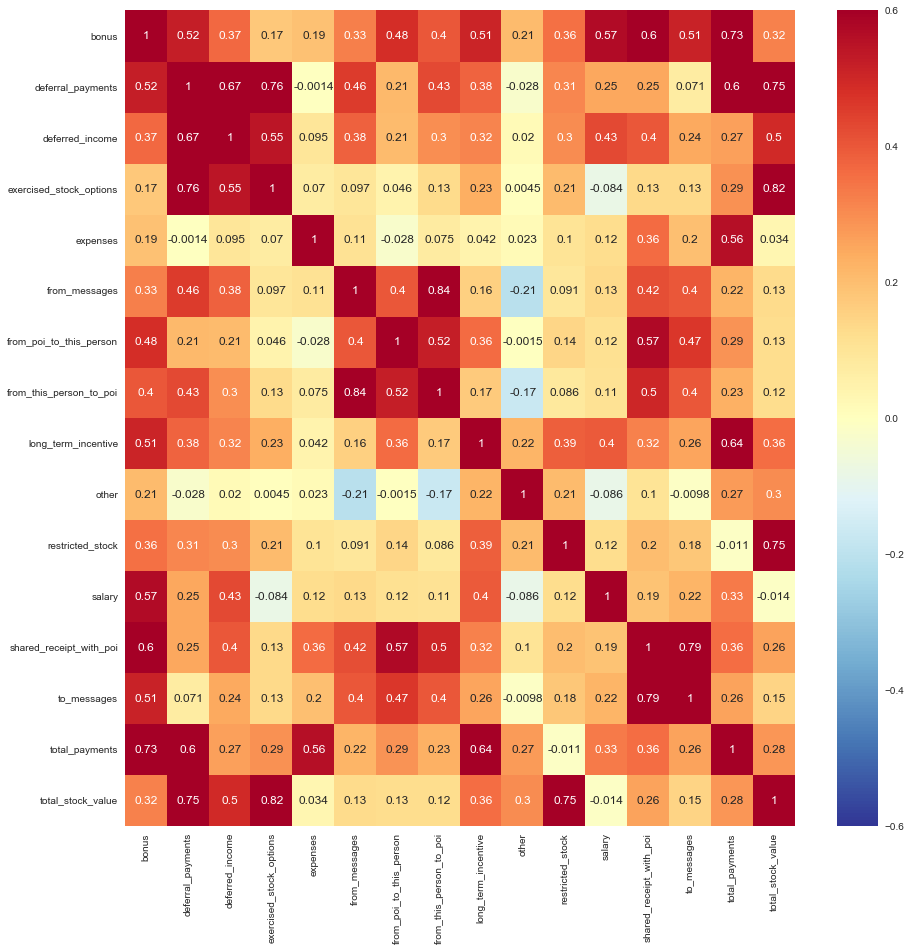

----------------------------------------------------------------
column bonus has 64 nan entries
column deferral_payments has 107 nan entries
column deferred_income has 97 nan entries
column exercised_stock_options has 44 nan entries
column expenses has 51 nan entries
column from_messages has 60 nan entries
column from_poi_to_this_person has 60 nan entries
column from_this_person_to_poi has 60 nan entries
column long_term_incentive has 80 nan entries
column other has 53 nan entries
column restricted_stock has 36 nan entries
column salary has 51 nan entries
column shared_receipt_with_poi has 60 nan entries
column to_messages has 60 nan entries
column total_payments has 21 nan entries
column total_stock_value has 20 nan entries
----------------------------------------------------------------
columns bonus has 64 nan entries
    use total_payments_grp to fill, still has 34 nan entries
    use shared_receipt_with_poi_grp to fill, still has 20 nan entries
    use salary_grp to fill, still h

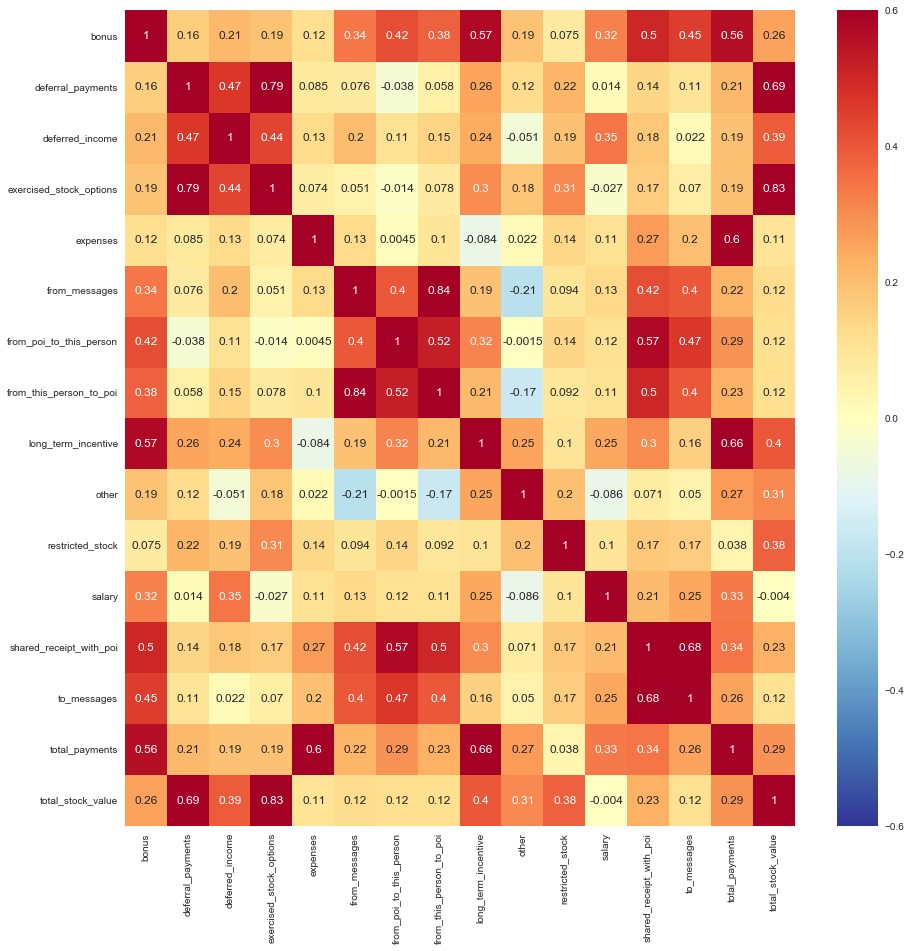

----------------------------------------------------------------
column bonus has 19 nan entries
column deferral_payments has 1 nan entries
column deferred_income has 22 nan entries
column exercised_stock_options has 8 nan entries
column expenses has 21 nan entries
column from_messages has 60 nan entries
column from_poi_to_this_person has 60 nan entries
column from_this_person_to_poi has 60 nan entries
column long_term_incentive has 45 nan entries
column other has 53 nan entries
column restricted_stock has 17 nan entries
column salary has 51 nan entries
column shared_receipt_with_poi has 39 nan entries
column to_messages has 39 nan entries
column total_payments has 21 nan entries
column total_stock_value has 16 nan entries
----------------------------------------------------------------
columns bonus has 19 nan entries
    use long_term_incentive_grp to fill, still has 19 nan entries
    use total_payments_grp to fill, still has 10 nan entries
    use shared_receipt_with_poi_grp to fil

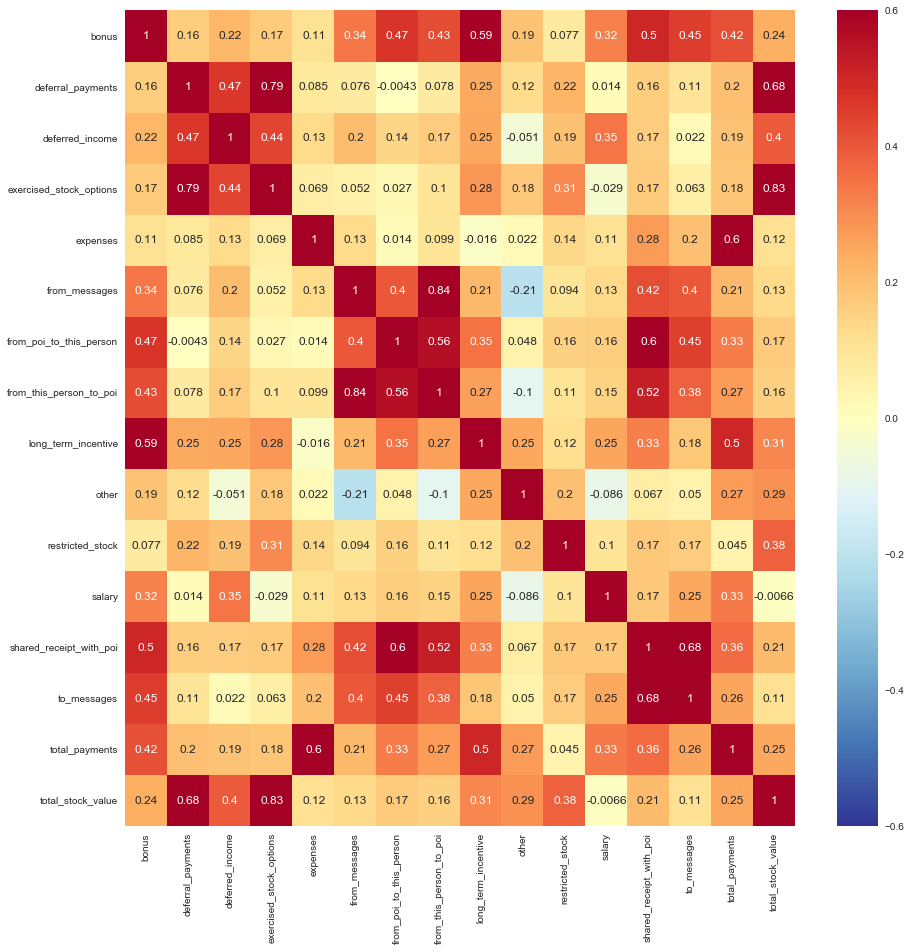

----------------------------------------------------------------
column bonus has 10 nan entries
column deferral_payments has 1 nan entries
column deferred_income has 22 nan entries
column exercised_stock_options has 1 nan entries
column expenses has 21 nan entries
column from_messages has 60 nan entries
column from_poi_to_this_person has 39 nan entries
column from_this_person_to_poi has 39 nan entries
column long_term_incentive has 19 nan entries
column other has 53 nan entries
column restricted_stock has 17 nan entries
column salary has 51 nan entries
column shared_receipt_with_poi has 19 nan entries
column to_messages has 39 nan entries
column total_payments has 10 nan entries
column total_stock_value has 1 nan entries
----------------------------------------------------------------
columns bonus has 10 nan entries
    use long_term_incentive_grp to fill, still has 10 nan entries
    use shared_receipt_with_poi_grp to fill, still has 10 nan entries

columns deferral_payments has 1 n

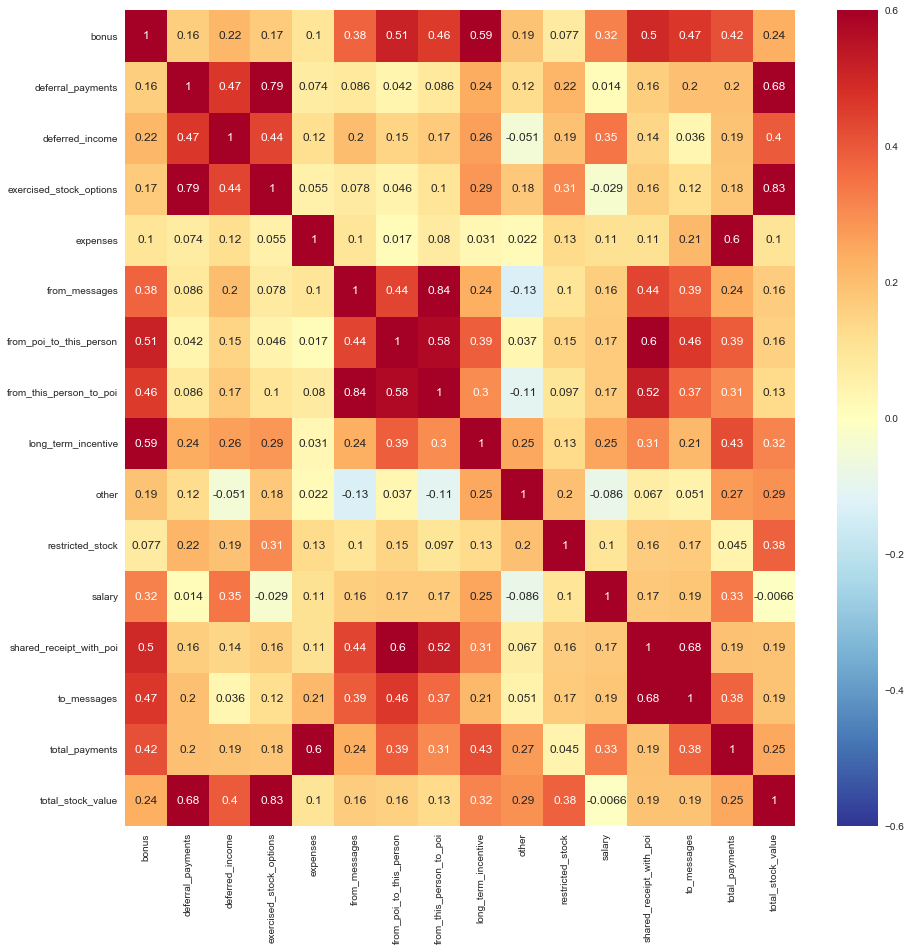

----------------------------------------------------------------
column bonus has 10 nan entries
column deferral_payments has 1 nan entries
column deferred_income has 22 nan entries
column exercised_stock_options has 1 nan entries
column expenses has 10 nan entries
column from_messages has 39 nan entries
column from_poi_to_this_person has 19 nan entries
column from_this_person_to_poi has 19 nan entries
column long_term_incentive has 10 nan entries
column other has 53 nan entries
column restricted_stock has 17 nan entries
column salary has 51 nan entries
column shared_receipt_with_poi has 10 nan entries
column to_messages has 19 nan entries
column total_payments has 10 nan entries
column total_stock_value has 1 nan entries
----------------------------------------------------------------
columns bonus has 10 nan entries
    use long_term_incentive_grp to fill, still has 10 nan entries
    use from_poi_to_this_person_grp to fill, still has 10 nan entries

columns deferral_payments has 1 n

In [12]:
df_clp2 = df_clp.copy()
runtime = 1
while df_clp2.isnull().any().any() and runtime < 5:
    print('-----------------------------run the '+str(runtime)+'-th time------------------------------------')
    df_clp2 = run_corr_and_fill(df_clp2)
    runtime +=1


In [13]:
df2 = fill_and_scale(df_clp2,'median','minmax')
train_X = df2[:train_num]
test_X = df2[train_num:]
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
estimator2 = GradientBoostingClassifier()

In [16]:
estimator2 = GradientBoostingClassifier()
print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
outcome = estimator2.predict_proba(test_X)[:,1]
print(outcome)
print(outcome.shape)
write_prob('02_20_5.csv',test_name,outcome)

0.822794117647
prob_out.shape (29,)
_test_Y.shape (29,)
accuracy: 0.862068965517
aucscore: 0.755
[  1.29492753e-02   2.93327579e-01   7.92691247e-01   1.41462372e-03
   2.07552765e-02   2.61472596e-01   8.15573641e-01   1.73838823e-04
   1.69428421e-04   7.84555941e-04   1.23180856e-03   1.85601608e-04
   1.85601608e-04   1.73838823e-04   2.16259077e-03   2.31418435e-04
   2.78493280e-04   8.64771722e-01   1.92605765e-03   1.90432935e-04
   9.50951907e-01   3.07120957e-02   2.32230615e-04   8.15298804e-04
   1.69428421e-04   1.69428421e-04   3.50139882e-03   1.69428421e-04
   1.04272689e-03   8.80268171e-02   1.85601608e-04   1.86421098e-04
   4.74203270e-02]
(33,)


bonus                      1.000000
total_payments             0.729902
shared_receipt_with_poi    0.596214
salary                     0.569033
deferral_payments          0.521292
long_term_incentive        0.506592
from_poi_to_this_person    0.484367
to_messages                0.439869
from_this_person_to_poi    0.399677
deferred_income            0.368278
restricted_stock           0.356136
from_messages              0.326671
total_stock_value          0.319177
other                      0.233403
expenses                   0.192373
exercised_stock_options    0.173491
Name: bonus, dtype: float64
total_payments


64

In [6]:
len(df.columns)

16

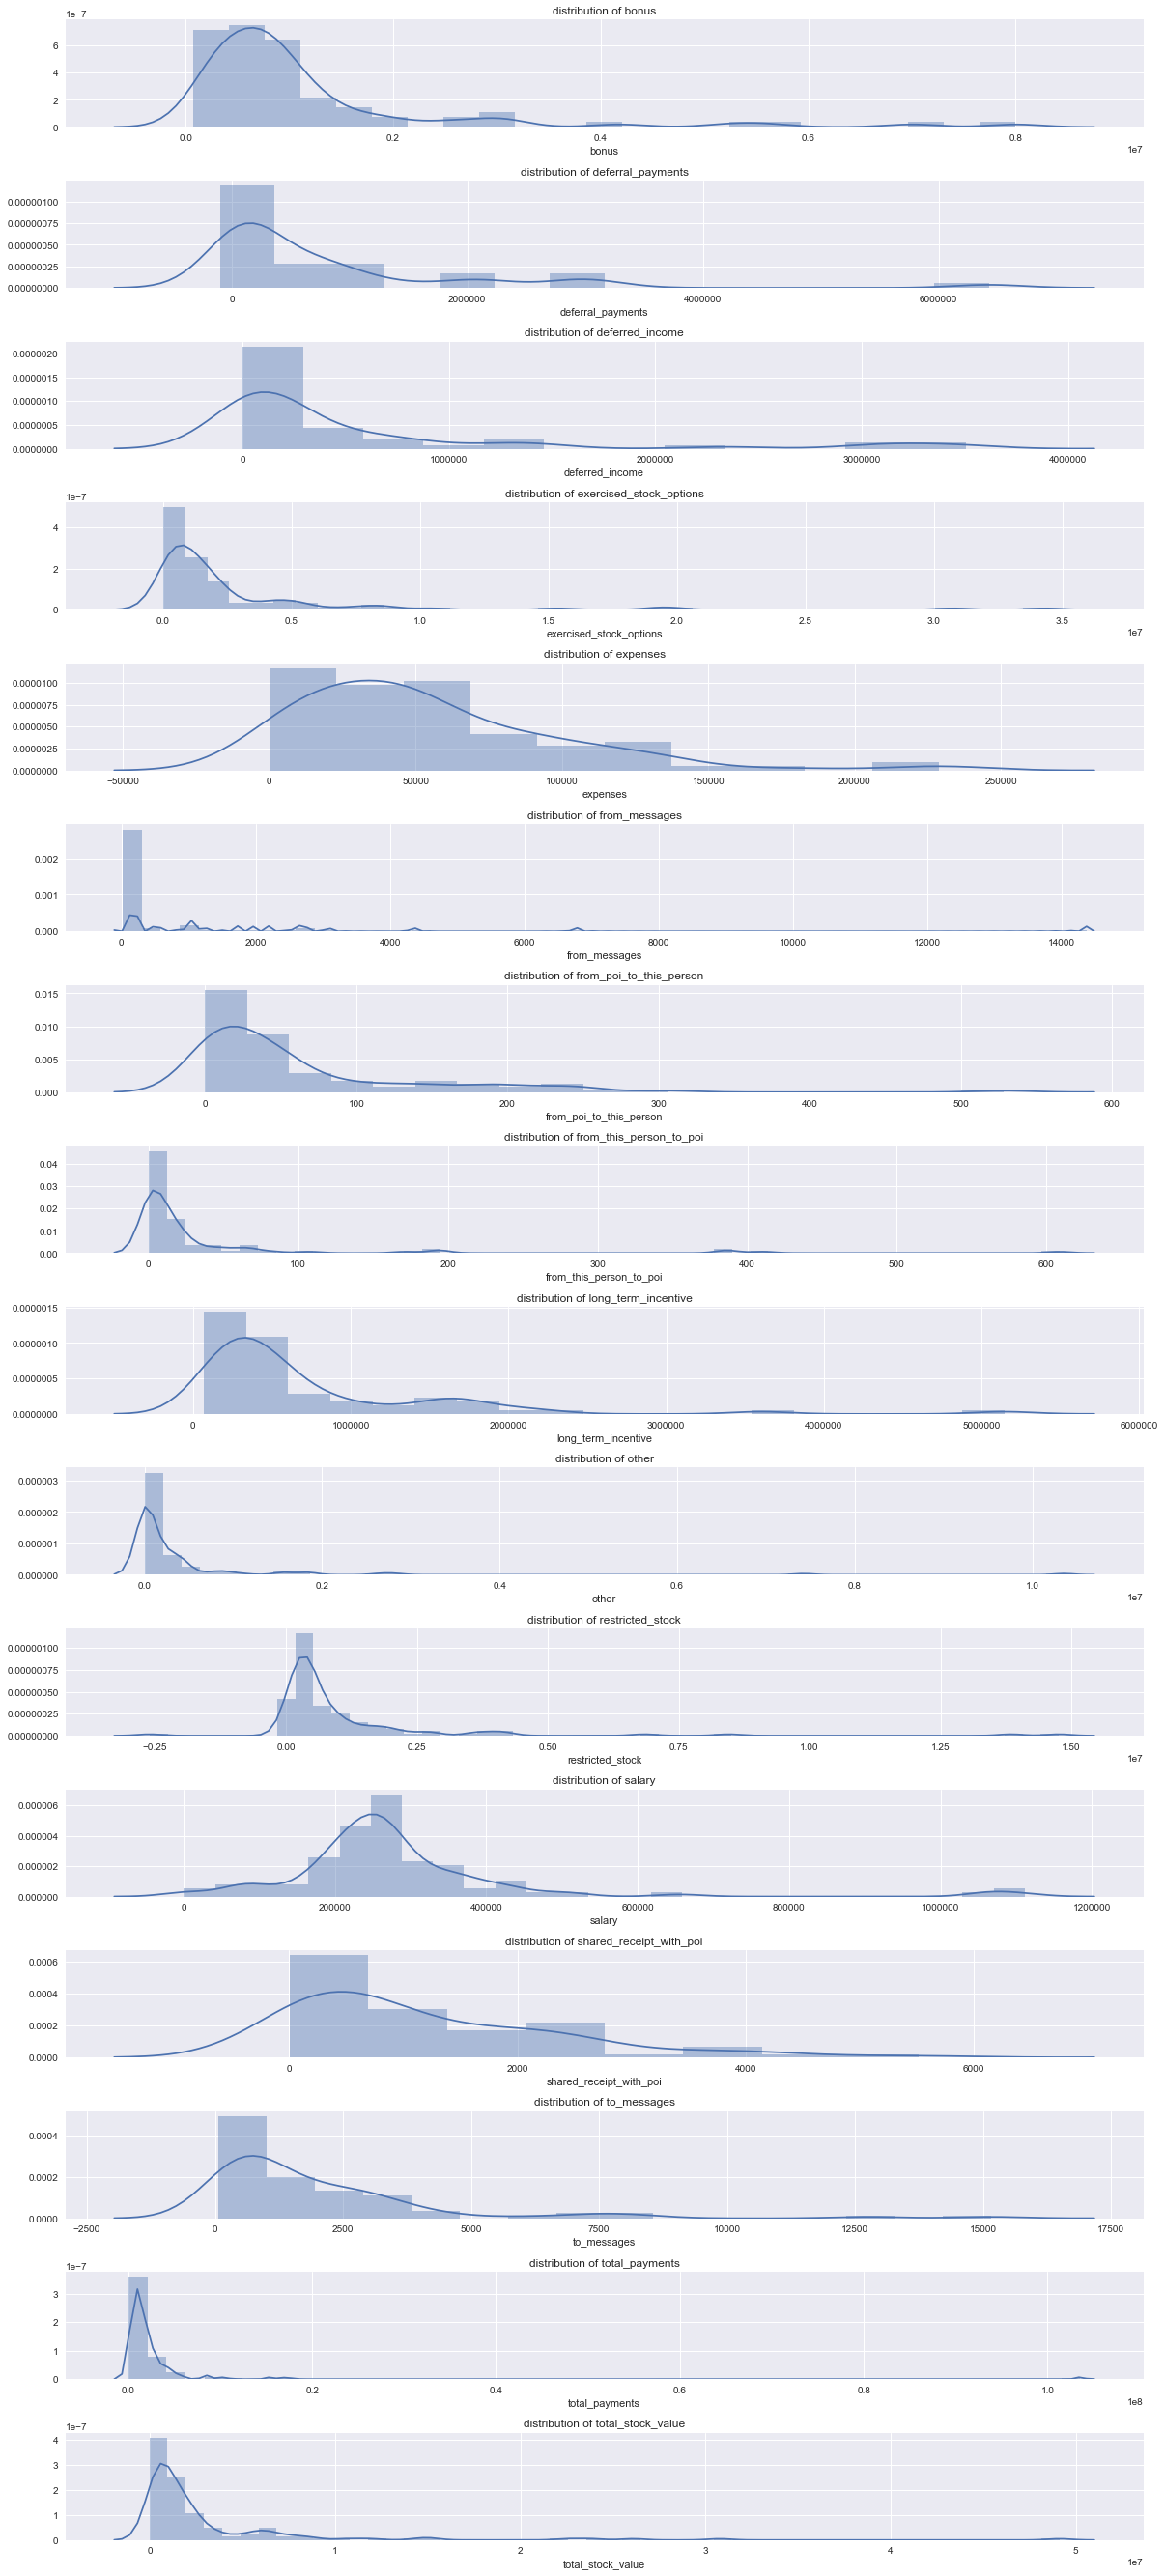

In [7]:
fig_num = len(df.columns)
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for col in df:
    plt.subplot(fig_num,1,index)
    plt.title("distribution of "+col)
    sns.distplot(df[col].dropna())
    index += 1
plt.show()

In [14]:
df_clp = df.copy()
df_clp = clip_outliers(df_clp,'bonus', 0, 4e6)
df_clp = clip_outliers(df_clp,'deferral_payments', 0, 3e6)
df_clp = clip_outliers(df_clp,'deferred_income', 0, 2e6)
df_clp = clip_outliers(df_clp,'exercised_stock_options', 0, 1e6)
df_clp = clip_outliers(df_clp,'expenses', 0, 2e5)
df_clp = clip_outliers(df_clp,'from_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'from_poi_to_this_person', 0, 300)
df_clp = clip_outliers(df_clp,'from_this_person_to_poi', 0, 100)
df_clp = clip_outliers(df_clp,'long_term_incentive', 0, 3e6)
df_clp = clip_outliers(df_clp,'other', 0, 2e6)
df_clp = clip_outliers(df_clp,'restricted_stock', 0, 5e6)
df_clp = clip_outliers(df_clp,'salary', 0, 7e5)
df_clp = clip_outliers(df_clp,'to_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'total_payments', 0, 2e7)
df_clp = clip_outliers(df_clp,'total_stock_value', 0, 1e7)

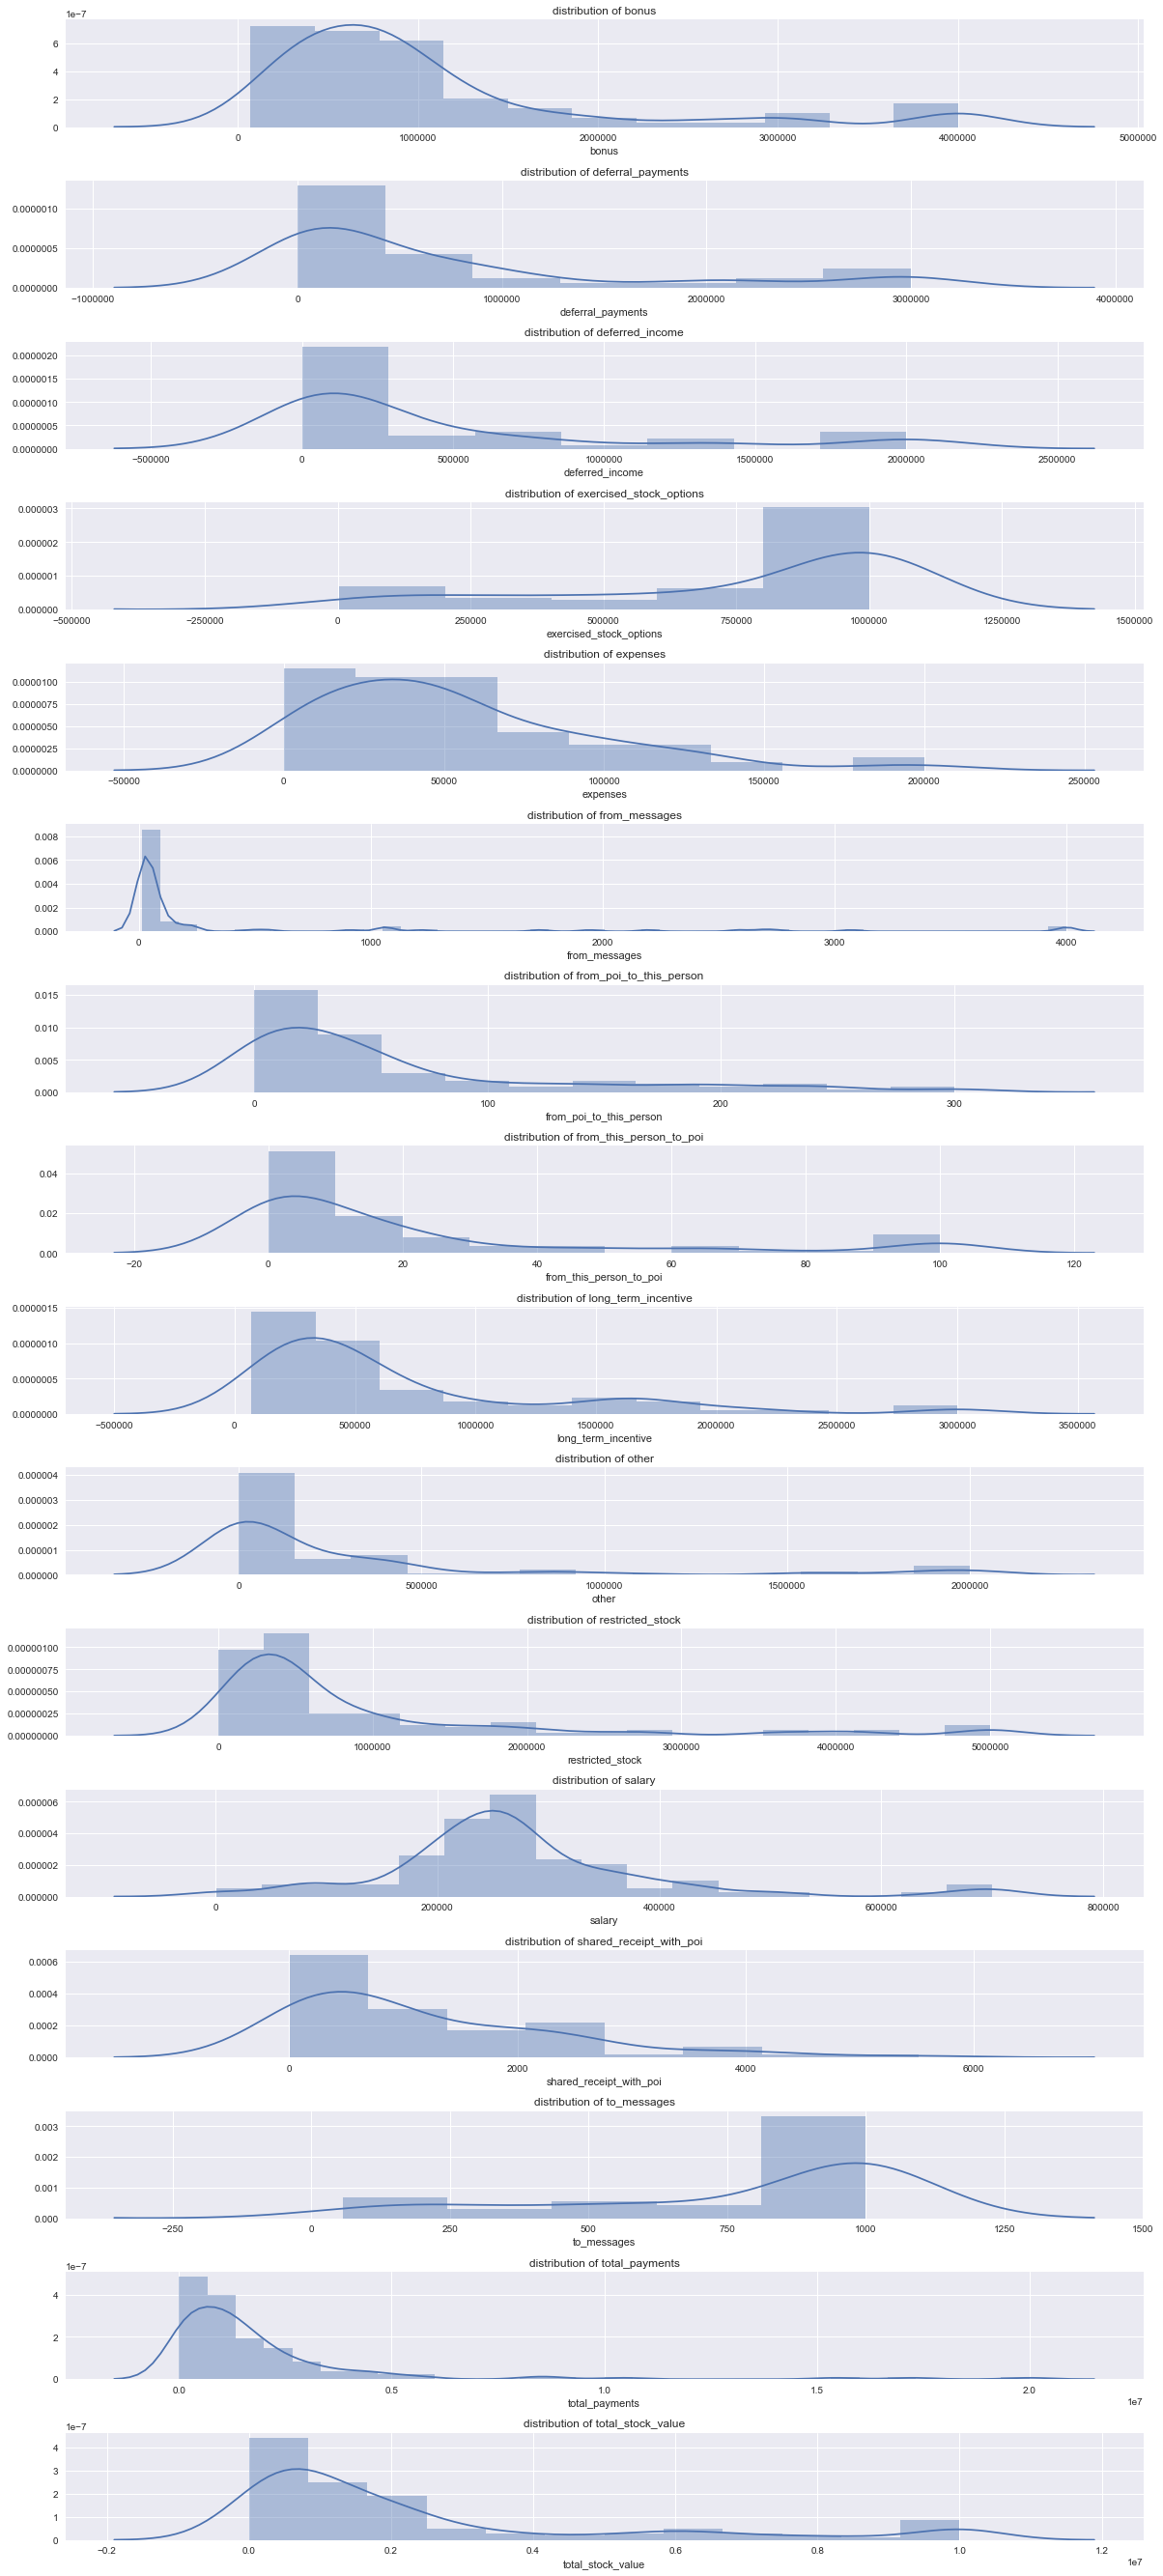

In [13]:
fig_num = len(df.columns)
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for col in df:
    plt.subplot(fig_num,1,index)
    plt.title("distribution of "+col)
    sns.distplot(df_clp[col].dropna())
    index += 1
plt.show()

# vocabulary
* repayment: 貸款的還款
* loan advances: 貸款預付款
* promissory note: 本票
* severance: 遣散